# Аналитика в авиакомпании
Компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
## Шаг 4. Аналитика средствами Python
### ***Описание данных***
Таблица model_flights
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

Таблица city_flights
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

# Содержание:
## 1. Загрузка и изучение данных.
## 2. Топ-10 городов по количеству рейсов
## 3. Графики
* 3.1. Зависимость количества рейсов от моделей самолетов
* 3.2. Среднее количество полетов в различные города России
* 3.3. Топ-10 городов по количеству полетов

## 4. Вывод

### 1. Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

#### 1.1. Импортируем файлы

In [2]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

#### 1.2. Изучение даннх

In [3]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Нет пропусков. Нет дубликаотов. Все данные в подходящих типах: 
 * Столбец model - тип object (текстовый формат)
 * Столбец flights_amount - тип int64 (целочиленный)

In [5]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
city_flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Проверка на будликаты

In [7]:
city_flights.duplicated().sum()

0

Нет пропусков. Нет дубликаотов. Все данные в подходящих типах (округлим столбец **average_flights** до 2х знаков после запятой): 
 * Столбец city - тип object (текстовый формат)
 * Столбец average_flights - тип float64 (число с плавающей точкой)

Округлим до 2х знаков после запятой

In [8]:
city_flights['average_flights'] = city_flights['average_flights'].round(2)

### 2. Выберем топ-10 городов по количеству рейсов

In [9]:
city_flights_top_10 = city_flights.sort_values('average_flights', ascending=False).reset_index(drop=True).head(10)

In [10]:
city_flights_top_10

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


### 3. Сторим графики
#### 3.1. Зависимость количества рейсов от моделей самолетов

In [11]:
(model_flights.sort_values('flights_amount', ascending=False).reset_index(drop=True).style
                                        .bar(subset=['flights_amount'], color='#97F0AA', vmin=0, width=100)
                                        .set_caption('Данные по количеству совершенных полетов по каждой модели самолета')
)

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


Как это не странно, самолеты, которые у всез на слуху (Airbus и Boeing) летают значительно меньше чем Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100

#### 3.2. Среднее количество полетов в различные города России

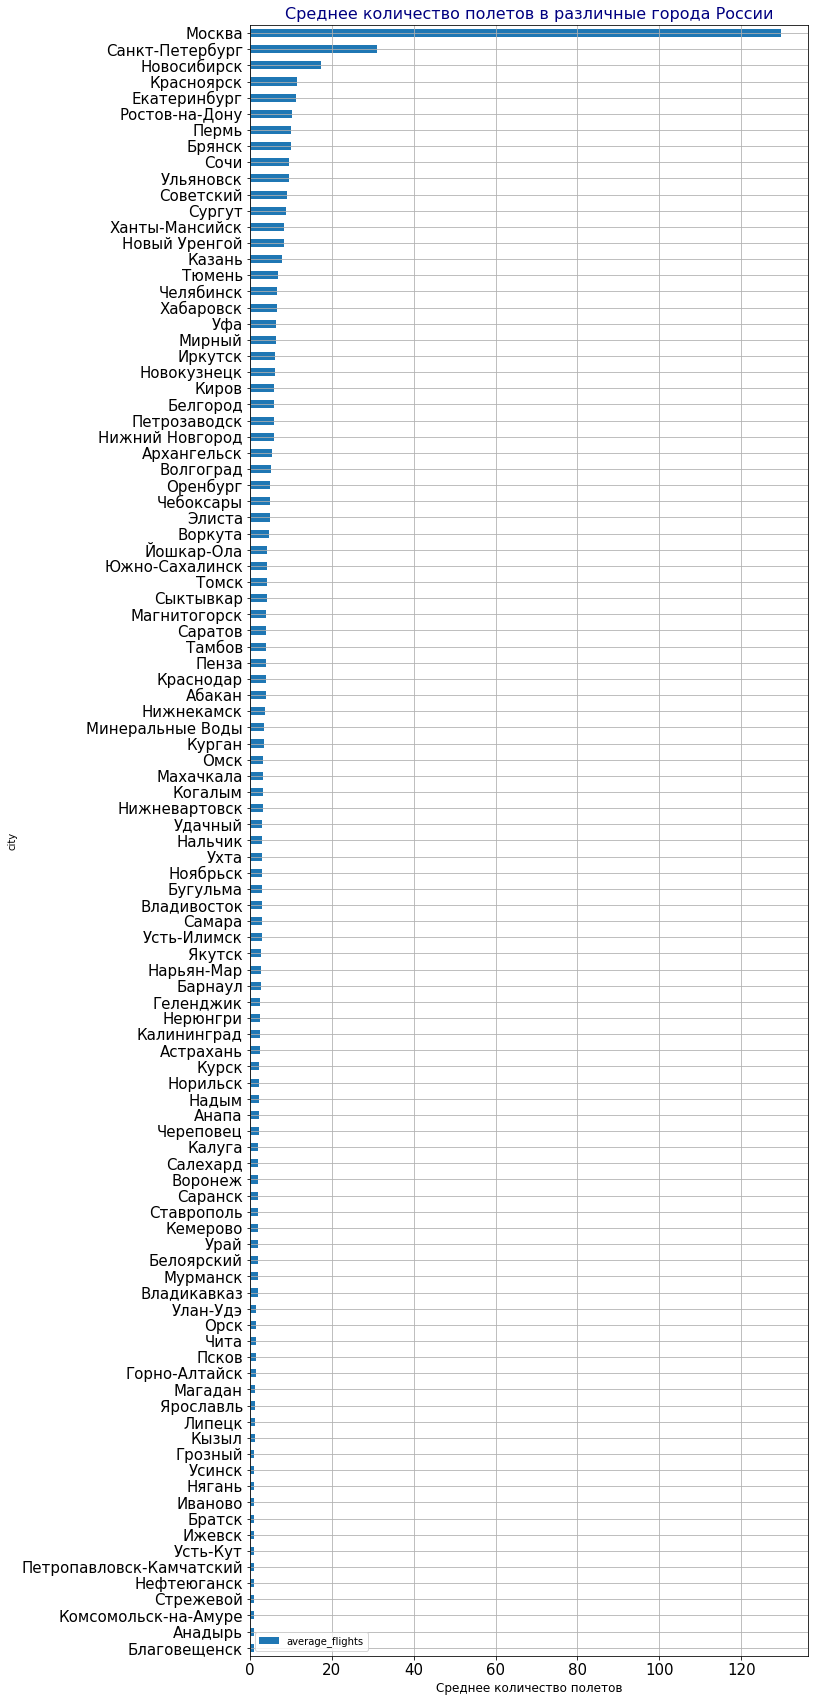

In [12]:
(city_flights.sort_values('average_flights', ascending=True).plot(kind='barh', x='city', y='average_flights',
                                                                       figsize=(10, 30), fontsize=15, grid=True)
)
plt.xlabel('Среднее количество полетов', fontsize=12)
plt.title('Среднее количество полетов в различные города России', fontsize=16, color='navy')
plt.show()

#### 3.3. Топ-10 городов по количеству полетов

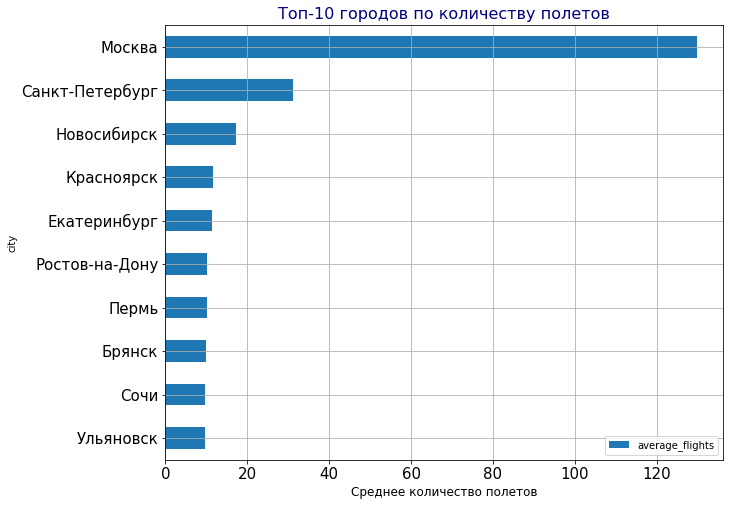

In [13]:
(city_flights_top_10.sort_values('average_flights', ascending=True).plot(kind='barh', x='city', y='average_flights',
                                                                  figsize=(10, 8), fontsize=15, grid=True)
)
plt.xlabel('Среднее количество полетов', fontsize=12)
plt.title('Топ-10 городов по количеству полетов', fontsize=16, color='navy')
plt.show()

### 4. Вывод

#### 1. Данные по количеству совершенных полетов по каждой модели самолета:
1. Сessna 208 Caravan - пассажировместимость 9 человек.
2. Bombardier CRJ-200 - пассажировместимость 50 человек.
3. Sukhoi SuperJet 100 - пассажировместимость 87 - 108 человек.
4. Airbus A321-200 - пассажировместимость 170 - 220 человек.
5. Boeing 737-300 - пассажировместимость 129 – 149 человек.
6. Airbus A319-100 - пассажировместимость 116-156 человек.
7. Boeing 767-3000 - пассажировместимость 218-350 человек.
8. Boeing 777-300 - В одноклассном исполнении может вместить до 550 человек. Если в салоне предусмотрены эконом- и бизнес-классы, вместимость составляет 468 пассажиров, в трехклассной компоновке – 368 пассажиров.


* Самолеты с небольшой пасажировместимостью (Сessna 208 Caravan (9чел.), Bombardier CRJ-200 (50 чел), Sukhoi SuperJet 100 (87 чел.)) много летают, думаю что бы окупиться и перевезти как можно больше людей.
* Boeing и Airbus с большой пасажировместимостью (от 220 до 550 человек) летают реже чем малая авиация.
* Возможно что в сентябре 2018 года, у компании "F9", летали все  небольшие самалеты (Сessna 208 Caravan - 1200шт, Bombardier CRJ-200 - 2700шт, Sukhoi SuperJet 100 - 3000шт), а Boeing и Airbus летли, только по несколько шт каждого класса.

#### 2. Данные по среднему количеству полетов в различные города России (за август)
* Москва лидирует. Вед это главный воздушный хаб страны. В среднем в день прилетает 130 самалетов.
* 2ое место с большим отставанием занимает Санкт-Перербург. 31 самалет в день
* 3е место - Новосибирск. 17 самалетов в день.
* Далее расположились наиболее крупные города России:
  * Красноярск
  * Екатеринбург
  * Ростов-на-Дону
  * Пермь
  * Брянск
  * Сочи
  * Ульяновск
